In [1]:
import tensorflow as tf
from tensorflow import keras
import joblib
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import cv2
from server.Wavelet import wavelett_trans
from matplotlib import pyplot as plt

In [2]:
celeb_folders = joblib.load('celeb_folders')

In [3]:
celeb_folders

{'ben_afflek': ['./Cropped Images/ben_afflek/ben_afflek1.jpg',
  './Cropped Images/ben_afflek/ben_afflek2.jpg',
  './Cropped Images/ben_afflek/ben_afflek3.jpg',
  './Cropped Images/ben_afflek/ben_afflek4.jpg',
  './Cropped Images/ben_afflek/ben_afflek5.jpg',
  './Cropped Images/ben_afflek/ben_afflek6.jpg',
  './Cropped Images/ben_afflek/ben_afflek7.jpg'],
 'jerry_seinfeld': ['./Cropped Images/jerry_seinfeld/jerry_seinfeld1.jpg',
  './Cropped Images/jerry_seinfeld/jerry_seinfeld2.jpg',
  './Cropped Images/jerry_seinfeld/jerry_seinfeld3.jpg',
  './Cropped Images/jerry_seinfeld/jerry_seinfeld4.jpg',
  './Cropped Images/jerry_seinfeld/jerry_seinfeld5.jpg',
  './Cropped Images/jerry_seinfeld/jerry_seinfeld6.jpg',
  './Cropped Images/jerry_seinfeld/jerry_seinfeld7.jpg',
  './Cropped Images/jerry_seinfeld/jerry_seinfeld8.jpg',
  './Cropped Images/jerry_seinfeld/jerry_seinfeld9.jpg',
  './Cropped Images/jerry_seinfeld/jerry_seinfeld10.jpg',
  './Cropped Images/jerry_seinfeld/jerry_seinfeld11.j

In [4]:
encode_celeb = {}
c = 0

for name in celeb_folders:
    encode_celeb[name] = c
    c += 1
encode_celeb

{'ben_afflek': 0,
 'jerry_seinfeld': 1,
 'lionel_messi': 2,
 'madonna': 3,
 'maria_sharapova': 4,
 'mindy_kaling': 5,
 'roger_federer': 6,
 'serena_williams': 7,
 'virat_kohli': 8}

In [5]:
X = []
Y = []
for celeb, path in celeb_folders.items():
    if not path:
        continue
    for train_data in path:
        img_train = cv2.imread(train_data)
        if img_train is None:
            continue
        scaled_raw_img = cv2.resize(img_train, (32,32))
        img_har = wavelett_trans(img_train, level=5)
        scaled_har_img = cv2.resize(img_har, (32,32))
        stack_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_har_img.reshape(32*32,1)))
        stack_img = stack_img.reshape(64,64)
        X.append(stack_img)
        Y.append(encode_celeb[celeb])

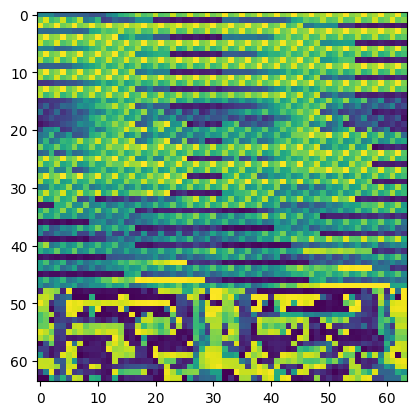

In [6]:
plt.imshow(X[1])

In [7]:
X = np.array(X, dtype=np.uint8)
Y = np.array(Y, dtype=np.uint8)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=20, test_size=0.1)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train.shape, X_test.shape

((198, 64, 64), (23, 64, 64))

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.001
                           )
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, Y, epochs=100)  


Epoch 1/100


7/7 [==============================] - 2s 122ms/step - loss: 267.5433 - accuracy: 0.1493
Epoch 2/100
7/7 [==============================] - 1s 99ms/step - loss: 159.1059 - accuracy: 0.1946
Epoch 3/100
7/7 [==============================] - 1s 107ms/step - loss: 67.4040 - accuracy: 0.3529
Epoch 4/100
7/7 [==============================] - 1s 102ms/step - loss: 60.8531 - accuracy: 0.4208
Epoch 5/100
7/7 [==============================] - 1s 117ms/step - loss: 23.2916 - accuracy: 0.6154
Epoch 6/100
7/7 [==============================] - 1s 110ms/step - loss: 9.1358 - accuracy: 0.8009
Epoch 7/100
7/7 [==============================] - 1s 113ms/step - loss: 6.3891 - accuracy: 0.7919
Epoch 8/100
7/7 [==============================] - 1s 111ms/step - loss: 22.3668 - accuracy: 0.6787
Epoch 9/100
7/7 [==============================] - 1s 97ms/step - loss: 16.9861 - accuracy: 0.7104
Epoch 10/100
7/7 [==============================] - 1s 107ms/step - loss: 27.7180 - accuracy: 0.687

7/7 [==============================] - 1s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 76/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 77/100
7/7 [==============================] - 1s 96ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 78/100
7/7 [==============================] - 1s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 79/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 80/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 81/100
7/7 [==============================] - 1s 95ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 82/100
7/7 [==============================] - 1s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0000e+00 - 

In [12]:
model.evaluate(X, Y)

7/7 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [13]:
model_cnn = keras.Sequential([
    keras.layers.Conv2D(input_shape=(64,64,1) ,filters=12, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Conv2D(filters= 12, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='tanh'),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(9, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.001)
model_cnn.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_cnn.fit(X, Y, epochs=100) 


Epoch 1/100
7/7 [==============================] - 1s 70ms/step - loss: 2.1387 - accuracy: 0.2443
Epoch 2/100
7/7 [==============================] - 0s 71ms/step - loss: 1.6181 - accuracy: 0.4525
Epoch 3/100
7/7 [==============================] - 1s 72ms/step - loss: 1.2568 - accuracy: 0.6425
Epoch 4/100
7/7 [==============================] - 1s 71ms/step - loss: 1.1056 - accuracy: 0.7059
Epoch 5/100
7/7 [==============================] - 0s 70ms/step - loss: 0.9046 - accuracy: 0.8054
Epoch 6/100
7/7 [==============================] - 0s 70ms/step - loss: 0.7905 - accuracy: 0.8462
Epoch 7/100
7/7 [==============================] - 1s 73ms/step - loss: 0.6011 - accuracy: 0.9367
Epoch 8/100
7/7 [==============================] - 0s 70ms/step - loss: 0.4705 - accuracy: 0.9683
Epoch 9/100
7/7 [==============================] - 0s 72ms/step - loss: 0.3462 - accuracy: 1.0000
Epoch 10/100
7/7 [==============================] - 1s 72ms/step - loss: 0.2630 - accuracy: 1.0000
Epoch 11/100
7/7 [

7/7 [==============================] - 1s 79ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 83/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 84/100
7/7 [==============================] - 1s 77ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 85/100
7/7 [==============================] - 1s 81ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 86/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 87/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 88/100
7/7 [==============================] - 1s 80ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 89/100
7/7 [==============================] - 1s 71ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 90/100
7/7 [==============================] - 1s 81ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 91/100
7/7 [==============================] - 1s 82ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 92/100
7/7 [=====

In [14]:
model_cnn.evaluate(X, Y)

7/7 [==============================] - 0s 14ms/step - loss: 0.0024 - accuracy: 1.0000


[0.002417268231511116, 1.0]

In [15]:
X.shape

(221, 64, 64)

In [16]:
input = X[0]
input = input.reshape(1,64,64)

In [17]:
res = model.predict(input)

1/1 [==============================] - 0s 95ms/step


In [18]:
res[0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.8347633e-29, 1.6466445e-26,
       0.0000000e+00], dtype=float32)

In [19]:
np.argmax(res[0])

0

In [20]:
np.around((res[0]*100),2).tolist()

[100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [21]:
input = X[114].reshape(1,64,64)
input.shape

(1, 64, 64)

In [22]:
(model_cnn.predict(input)*100)[0].tolist()

1/1 [==============================] - 0s 104ms/step


[0.02126777358353138,
 0.07815002650022507,
 0.060996949672698975,
 0.024056149646639824,
 0.0038502609822899103,
 99.60917663574219,
 0.031560566276311874,
 0.12149789929389954,
 0.04944387450814247]

In [23]:
np.argmax(model.predict(input)[0])

1/1 [==============================] - 0s 31ms/step


5

In [24]:
encode_celeb

{'ben_afflek': 0,
 'jerry_seinfeld': 1,
 'lionel_messi': 2,
 'madonna': 3,
 'maria_sharapova': 4,
 'mindy_kaling': 5,
 'roger_federer': 6,
 'serena_williams': 7,
 'virat_kohli': 8}